# Ensemble Model
앙상블
- 여러 머신러닝 모델을 연결하여 더 강력한 모델을 만드는 기법
- 모델의 성능을 끌어올리기 위해!!
- 랜덤포레스트(트리를 여러개사용), 그레디언트 부스팅 >> 제일 많이 씀!
- 나머지는 원리위주로 보기

## Voting
- 여러개의 분류기(classfier=clf, 여러 모델들)가 있을 때 투표로 최종 클래스 라벨을 정하는 것
- 말그대로 투표!!
- 분류기마다 weighting줄수있음!! 이것에 따라 결과가 달라질 수 있음(뭐에 더 가중치 주냐)
- 분류할때 confusion matrix.. >> `분류모델에서는 confusion matrix를 항상 같이 확인해줘야 한다!`
- 이질적인 모델들을 섞어주는게 좋다!!(모델 성질 자체가 이질적인 애들을!)

### confusion matrix
- sklearn에서 제공해줌
- confusion_matrix(실제 target값(y),  모델이 예측한 y값) >> 이렇게 넣어주면 확인 가능! >> 대각선 방향 수가 많으면 많을수록 좋다! 잘 분류한 것!

precision(정밀도)
- 얼마나 잘 예측했냐(예측한거 중에 맞은거) >> 헷갈...다시공부!!

recall(재현율)
- 얼마나 잘 맞췄냐(실제로 잘 맞게 맞춘거)  >> 헷갈...다시 공부!!

F-1-Score
- 분류에서 성능을 볼때 정밀도와 재현율을 다 활용해서 f1score로 .. 본다!

- T(True)가 중요할때 Accuracy, F(False)가 중요할 때는 F1-Score를 활용하는게 좋다.

precision 0.90 , recall 0.94
- 정밀도가 낮다
- 실제 2번인걸 잘 못맞춘거(예측을 잘  못한거)
- recal.. 실제 양성으로 예측못한게 있음..흠..

다시공부!!!!!!!!!

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

iris_data = load_iris()
iris_input_data = pd.DataFrame(iris_data.data, columns = iris_data.feature_names)
iris_target_data = pd.DataFrame(iris_data.target, columns = ['target'])
iris = pd.concat([iris_input_data, iris_target_data], axis = 1)
iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [2]:
# input, target 분리
X = iris.iloc[:,:-1]
y = iris.iloc[:, -1]

In [3]:
# train, test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [4]:
# 스케일 변환 / 데이터 표준화
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# 모델링
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

clf1 = LogisticRegression(multi_class='multinomial', 
                          random_state=1)
clf2 = svm.SVC(kernel='linear', 
               random_state=1) 
clf3 = GaussianNB()
 
clf_voting = VotingClassifier(             # clf_voting = model
                estimators=[
                    ('lr', clf1), 
                    ('svm', clf2), 
                    ('gnb', clf3)
                ],
                voting='hard',
                weights=[1,1,1])
clf_voting.fit(X_train_scaled, y_train)

VotingClassifier(estimators=[('lr',
                              LogisticRegression(multi_class='multinomial',
                                                 random_state=1)),
                             ('svm', SVC(kernel='linear', random_state=1)),
                             ('gnb', GaussianNB())],
                 weights=[1, 1, 1])

In [6]:
pred_voting = clf_voting.predict(X_test_scaled)
pred_voting

array([1, 0, 0, 1, 2, 2, 1, 1, 0, 0, 2, 0, 0, 2, 0, 0, 1, 0, 2, 0, 1, 1,
       0, 0, 2, 2, 1, 1, 1, 1])

In [7]:
clf_voting.score(X_train_scaled, y_train)

0.9666666666666667

In [8]:
clf_voting.score(X_test_scaled, y_test)

0.9333333333333333

In [9]:
from sklearn.metrics import classification_report
cf_matrix = classification_report(y_test, pred_voting) # 실제 결과랑 모델이 예측한 결과 넣어주기
print(cf_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.91      0.91      0.91        11
           2       0.86      0.86      0.86         7

    accuracy                           0.93        30
   macro avg       0.92      0.92      0.92        30
weighted avg       0.93      0.93      0.93        30



- 분류모델은 confusion matrix까지 확인해줘야 한다!!

## Bagging

- 배깅
- base_estimator(기초모델) > 하나의 모델을 여러개 쓰는거임! / n_estimators = 그 모델을 몇개쓸건지

In [10]:
from sklearn import datasets
raw_wine = datasets.load_wine()
# 원래 input data, target data 분리해줘야 함! (df보고, 분류해줌)
X = raw_wine.data # input data
y = raw_wine.target # target data

In [12]:
print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [18]:
pd.DataFrame(X, columns = raw_wine.feature_names).head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [15]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2])

In [ ]:
# 이런 데이터(이런 문제) 지도학습 - 분류! 해줘야 함.
# 만약 비지도로 하려면 y가 없을때.!! 비지도 - 클러스터링 (target이 존재하지 않을때 비지도!!!!!!!!!!)

In [19]:
raw_wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [26]:
# 실제 데이터는 target_names가 이럴거임!!
def decoding(data):
    if data == 0:
        return 'class_0'
    elif data == 1:
        return 'class_1'
    else:
        return 'class_2'
    
wine_class = pd.DataFrame(y, columns = ['target'])['target'].apply(decoding)
wine_input = pd.DataFrame(X, columns = raw_wine.feature_names)
wine = pd.concat([wine_input, wine_class], axis=1)

In [28]:
wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,class_0


In [ ]:
# 실제 만나는 데이터는 이럼!
# 뭘 input, target나눌건지
# target은 숫자로 잘 분류해줘야 함.

In [ ]:
# train/test split
from sklearn.model_selecton import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# 어떤 상황에서 test비율을 낮출까, 높일까? 보통 20~30%인데..
# 만약 30%했는데 train accuracy=0.6, test accuracy=0.55 라면.. >> train 비율 올리기!(일단 학습부터가 잘 안됨..)(train은 기본적으로 높으며.. 둘다 높으며 train, test 정확도 gap이 작은게 제일 좋음!)
# 데이터 개수가 1500 or 데이터 20000 일때 >> 1500개 일때 train의 비율을 더 높여야 함! >> 데이터가 적으니까 학습 덜 되니까.. train비율을 높여줘야 함! 일단 학습이되게!!

In [ ]:
# scaling
from sklearn.processing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [30]:
# modeling
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import BaggingClassifier
clf_bagging = BaggingClassifier(base_estimator = GaussianNB(),
                                n_estimators = 10)
clf_bagging.fit(X_train_scaled, y_train)

C:\Users\SBAUser\.venv\Second_Day\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


BaggingClassifier(base_estimator=GaussianNB())

In [32]:
pred_bagging = clf_bagging.predict(X_test_scaled)
print(pred_bagging)

[1 0 0 1 2 2 1 1 0 0 2 0 0 2 0 0 1 0 2 0 1 1 0 0 2 2 2 1 1 1]


In [33]:
clf_bagging.score(X_train_scaled, y_train)

0.975

In [34]:
clf_bagging.score(X_test_scaled, y_test)

0.9

In [35]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_bagging)

array([[12,  0,  0],
       [ 0,  9,  2],
       [ 0,  1,  6]], dtype=int64)

In [36]:
from sklearn.metrics import classification_report
cf_matrix = classification_report(y_test, pred_bagging)
print(cf_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       0.90      0.82      0.86        11
           2       0.75      0.86      0.80         7

    accuracy                           0.90        30
   macro avg       0.88      0.89      0.89        30
weighted avg       0.90      0.90      0.90        30



## Random Forest

- decision tree가 여러개 > decision tree를 다 `overfitting시켜서 평균`을 내는 것!
- random을 붙인 이유 >> 원 데이터셋을.. row를 다쓰지 않고 랜덤하게 랜덤 샘플, 랜덤 특성(이건 컬럼을 랜덤) >> `row랑 column을 랜덤해서 뽑는다`
- 의사결정나무 모델 하나가 사용하는 데이터, 컬럼, ROW 다르다!
- 배깅해서 트리개수를 늘리는거(트리01234)랑 랜덤포레스트 쓴거.. 다른점.. >> 선이 스무딩해짐. 오버피팅도 생기지 않고..

- 의사결정나무(max_depth주니까 오버피팅이 좀 떨어짐) >> 일반화 굿 / 랜덤포레스트 훈련, 테스트 정확도 다 더 굿
- 우리는 앙상블 모델을 잘 써야 함!!(정확도가 더 좋으니까! 웬만해서는 더 좋음!)

- 의사결정나무는 특정 변수가 중요하게 동작함(트루,폴스로) / 랜덤포레스트는 변수 하나를 의도적으로 빼니까 골고루.. 여러 특성, 컬럼, 변수들이 여러개가 골고루 고려됨! 
- 이 모델이 좀 더 안정적인 느낌, 모델임!

- max_depth, n_estimators 바꿔가며 정확도 비교해보기!

## Gradient Boosting
- 얘는 underfitting시킴!
- 그 전거를 얼마나 베낄거냐.. (learning rate)(얘가 높을수록 오버피팅?,,그 전거를 많이 학습?!)
- 의사결정나무보다는 좋은 성능!!
- max_depth..등 줄 수 있음!(랜덤포레스트도있을듯!)
- max_depth커질수록, learning_rate(더 많이 베끼니까..더 많이많이 학습) 커질수록 오버피팅될 가능성이 높다!

- max_depth, n_estimators, learning_rate 바꿔가며 정확도 비교해보기! >> 오버피팅을 줄이는 방향으로 해보자!!(좀 낮추면.. 될듯?!)

- 랜덤포레스트보다는.. 덜 안정적.. 내가 쥐어짜서 성능을 높이겠다! 이런 느낌!
- 왜 몇개 특성만 높음?!? weaker..?? 물어보기!

## [실습] Random Forest vs Gradient Boosting

In [ ]:
# 모델을 각각 만들어 성능 비교하기 (accuracy, confusion_matrix 등)
# feature importance 비교
# hyperparameter tuning하여 성능 끌어올리기
# confusion_matrix 해석하기

In [1]:
from sklearn.datasets import load_breast_cancer
import pandas as pd

datasets = load_breast_cancer()
input_data = pd.DataFrame(datasets.data, columns = datasets.feature_names)
target_data = pd.DataFrame(datasets.target, columns = ['target'])
df = pd.concat([input_data, target_data], axis = 1)
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


In [3]:
# input, target 분리
X = df.iloc[:,:-1]
y = df.iloc[:, -1]

In [4]:
# train, test 분리
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

In [5]:
# 스케일 변환
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

### Random Forest

In [38]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier(max_depth=6,
                                n_estimators=8,
                                random_state=0) # default > max_depth=None, n_estimators=100
clf_rf.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=6, n_estimators=8, random_state=0)

In [39]:
pred_rf = clf_rf.predict(X_test_scaled)
print(pred_rf)

[1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1
 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 0]


In [ ]:
# 6, 8 / 0.989010989010989 / 0.9736842105263158 
# 이와 같은 hyperparameter를 줬을 때 accuray가 train, test 다 높으면서 gap 차이가 제일 적었다.

In [51]:
print('훈련 데이터 정확도:', clf_rf.score(X_train_scaled, y_train))
print('테스트 데이터 정확도:', clf_rf.score(X_test_scaled, y_test))

훈련 데이터 정확도: 0.989010989010989
테스트 데이터 정확도: 0.9736842105263158


In [52]:
# feature importance
importance = clf_rf.feature_importances_
importance

array([0.01059418, 0.00979152, 0.01275915, 0.07006767, 0.00332577,
       0.00982484, 0.11358067, 0.11617351, 0.00074023, 0.00078076,
       0.06619252, 0.00459757, 0.01218267, 0.16847251, 0.01745513,
       0.00325529, 0.00268546, 0.0050545 , 0.00765461, 0.01166964,
       0.07644423, 0.01686822, 0.01855299, 0.00114817, 0.00763471,
       0.00572746, 0.00221832, 0.20525835, 0.00113672, 0.01815263])

<BarContainer object of 30 artists>

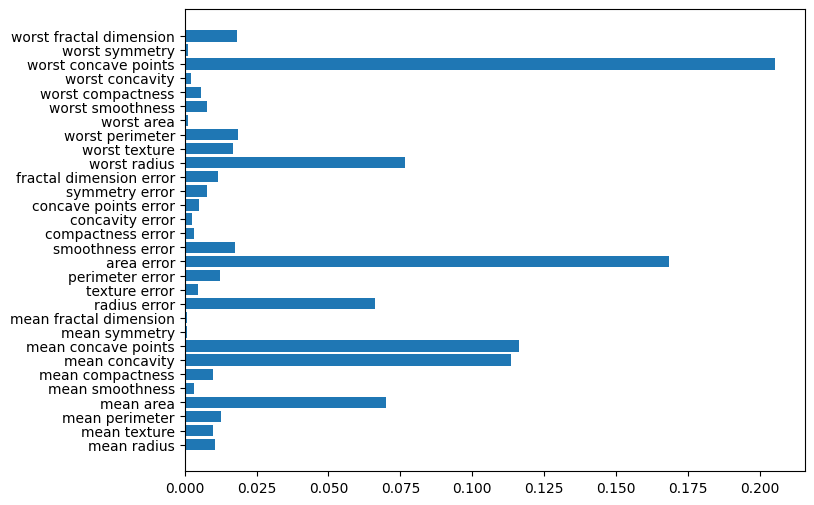

In [53]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.barh(X.columns, importance) # 컬럼명을 y축에 오도록 > plt.barh() 사용

In [ ]:
# confusion_matrix

In [61]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_rf)

array([[10,  0,  0],
       [ 0, 11,  0],
       [ 0,  1,  8]], dtype=int64)

In [62]:
from sklearn.metrics import classification_report
cf_matrix = classification_report(y_test, pred_rf)
print(cf_matrix)

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        11
           2       1.00      0.89      0.94         9

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30



### Gradient boosting

In [130]:
from sklearn.ensemble import GradientBoostingClassifier
clf_gb = GradientBoostingClassifier(n_estimators=50, learning_rate=0.3, # default > max_depth=3, n_estimators=100, learning_rate=0.1
                                 max_depth=4, random_state=0).fit(X_train, y_train)
clf_gb.fit(X_train_scaled, y_train)

GradientBoostingClassifier(learning_rate=0.3, max_depth=4, n_estimators=50,
                           random_state=0)

In [131]:
pred_gb = clf_rf.predict(X_test_scaled)
print(pred_gb)

[1 1 0 0 0 0 0 1 0 0 1 1 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 1 1 1 1 1 0 1
 1 0 0 1 0 1 0 0 0 0 1 1 0 1 1 1 0 0 1 0 1 1 1 0 1 0 0 0 1 1 1 0 1 0 0 0 1
 0 1 1 1 0 0 1 1 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 0 1 1 1 1 1 1 1 1 0 1
 1 1 0]


In [128]:
# hyperparameter
# 10, 0.4, 2 >> 0.989010989010989 / 0.9649122807017544
# 50, 0.3, 4 >> 1.0 / 0.9736842105263158

In [132]:
print('훈련 데이터 정확도:', clf_gb.score(X_train_scaled, y_train))
print('테스트 데이터 정확도:', clf_gb.score(X_test_scaled, y_test))

훈련 데이터 정확도: 1.0
테스트 데이터 정확도: 0.9736842105263158


In [133]:
# feature importance
importance = clf_gb.feature_importances_
importance

array([6.06671740e-06, 1.93693912e-02, 4.95671326e-03, 1.00367261e-03,
       4.44655878e-03, 1.02613875e-03, 6.65404466e-03, 4.81268397e-02,
       4.28929754e-03, 2.94013876e-03, 5.66099604e-03, 1.45475939e-02,
       3.29617007e-05, 6.34710007e-03, 3.08223865e-03, 4.58488030e-03,
       1.85217453e-02, 8.96647704e-06, 1.68169249e-03, 3.45940532e-04,
       5.54648474e-02, 2.74318881e-02, 7.90526960e-03, 7.87430968e-02,
       1.36781331e-03, 1.02236086e-04, 9.07494030e-03, 6.61119400e-01,
       6.25461308e-04, 1.05320699e-02])

<BarContainer object of 30 artists>

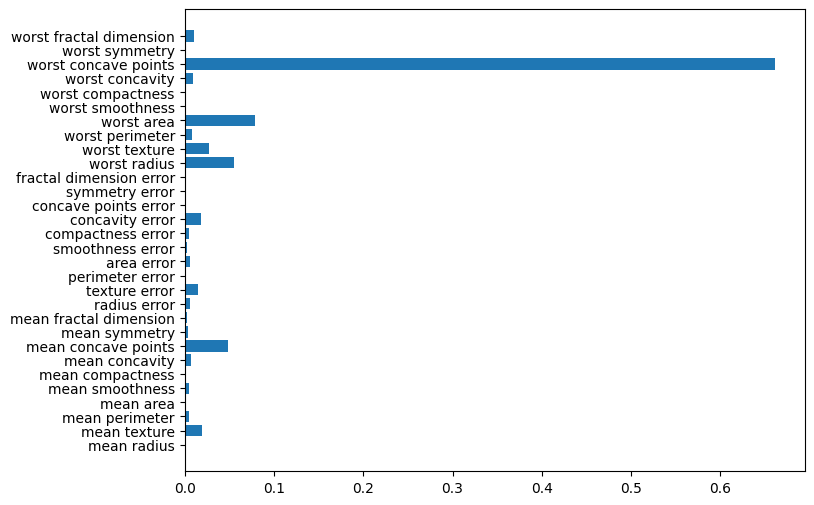

In [134]:
import matplotlib.pyplot as plt

plt.figure(figsize = (8,6))
plt.barh(X.columns, importance) # 컬럼명을 y축에 오도록 > plt.barh() 사용

In [ ]:
# confusion_matrix

In [135]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, pred_gb)

array([[43,  0],
       [ 3, 68]], dtype=int64)

In [136]:
from sklearn.metrics import classification_report
cf_matrix = classification_report(y_test, pred_gb)
print(cf_matrix)

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        43
           1       1.00      0.96      0.98        71

    accuracy                           0.97       114
   macro avg       0.97      0.98      0.97       114
weighted avg       0.98      0.97      0.97       114



인사이트
- `worst concave points`라는 변수가 암의 양성, 음성 판단에 많은 영향을 끼친다. << importance 그래프 비교
- random forest 모델이 gradient boosting보다 다양한 변수, 특성들을 반영해서 학습한다.
- 재현율, 정밀도.. 이건 좀 더 공부해야겠다.. 해석이 아직 어렵다.

In [ ]:
# 그냥 모델 쓰는 것보다 앙상블모델이 일반적으로 성능이 좋음
# 아래 2개가 경진대회에서 많이 사용하는 모델임!
# 가끔은 랜덤포레스트, 앙상블모델보다.. 의사결정나무가 좋을 때가 있음

# XGBoost
# LightRGBM

## Stacking

- 모델을 위한 모델인 느낌!
- 모델이 하나 더 있는 느낌(앞에 모델들이 개, 고양이 분류였다면, 그 다음은 이게 포유류인지.. 이걸 판단하는?!)
- 모델들을 StackingClassifier모델에 estimators로 넣어줌, LogisticRegression >> 확률이 나옴(암인지 아닌지..)
- 앞에는 암인지 아닌지(0또는1, 분류, classifier) / 뒤에는 regression(확률.. 이게 암일지 아닐지 확률..)

- LogisticRegression은 분류모델임!! (종속변수가 범주형일때 사용하는!! 범주형인데 예측해야할때..사용하는걸로 ..알고있닷)